<a href="https://colab.research.google.com/github/lucvseco/MLP_digits/blob/main/pratica_MLPs_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificando digítos com MLPs

Vamos utilizar um modelo MLP para realizar a classificação de imagens que possuem digítos (0-9).

Para o teste utilizaremos o dataset digits do sklearn (https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html)

O dataset é composto por imagens 8x8 em tons de cinza, cada uma com sua label correspondente (0-9).


## 01 - Importando as bibliotecas e carregando o dataset

Utilizamos o módulo datasets do sklearn para carregar os dados a partir da função load_digits(return_X_y=True).

Passamos o parâmetro return_X_y com True para que a função retorne os exemplos e as anotações em variaveis separadas, atribuimos o resultado na variavel images e target, respectivamente. As variáveis serão retornadas como numpy.*ndarray*

In [1]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import numpy as np
import cv2

images, target = datasets.load_digits(return_X_y=True)

In [2]:
## - Verificar as dimensões das variáveis images e target

shape_images = images.shape
shape_target = target.shape

print(shape_images)
print(shape_target)

(1797, 64)
(1797,)


In [3]:
## - Quantos exemplos possui o dataset digits?

dataset_size = shape_images[0] + shape_target[0]

print(dataset_size)

3594


## 02 - Visualizando os exemplos

Utilizando a biblioteca matplotlib, vamos tentar visualizar alguns dos dados disponíveis no dataset.

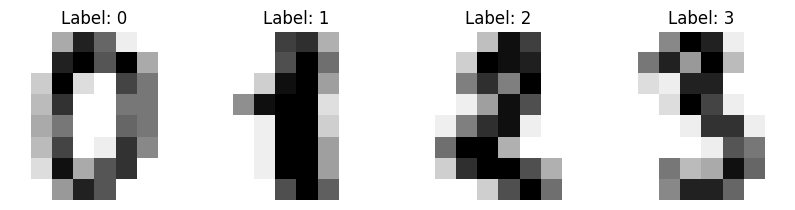

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, images, target):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {prediction}")

## 03 - Separando as partições

Utilizaremos a função train_test_split do sklearn para separar as partições em dois conjuntos (treino e teste). Utilizaremos o conjunto de treino para ajustar o modelo e o conjunto de teste para avaliar o desempenho do nosso modelo.

Utilizaremos a função de forma que o conjunto de treino possua 70% dos dados e o conjunto de teste possua 30%.

Referência train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [5]:
X_train, X_test = None, None
y_train, y_test = None, None

# Utilize a função train_test_split para obter as partições

X_train, X_test, y_train, y_test = train_test_split(images, target, test_size=0.30, random_state=42)

# Computa o tamanho de cada partição, atribuindo o valor nas variaveis abaixo
train_size = X_train.shape[0] + y_train.shape[0]
test_size  = X_test.shape[0] + y_test.shape[0]

print(train_size, test_size)

2514 1080


## 04 - Inicializando e treinando o modelo

Agora vamos carregar e treinar o modelo utilizando os dados da partição de treino.

Vamos utilizar a classe MLPClassifier do sklearn para instanciar a nossa rede (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)

Criar um modelo que contenha 3 camadas escondidas de dimensão (50,20,10) utilizando a função de ativação relu, otimizador adam, e learning rate 0.001. (Utilize max_iter=300)

In [6]:
# Inicializar o modelo instanciando o classificador com o sklearn e atribua a variavel network

network = MLPClassifier(hidden_layer_sizes=(50, 20, 10),
                    activation='relu',
                    solver='adam',
                    learning_rate_init=0.001,
                    max_iter=300,
                    random_state=1)


print(network.activation, network.solver,
      network.learning_rate_init, network.hidden_layer_sizes)

relu adam 0.001 (50, 20, 10)


In [7]:
# Utilizar a função fit para realizar o treinamento com as partições X_train e y_train

network.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300, random_state=1)

## 05 - Avaliando o resultado

Utilizaremos a função predict, para realizar as predições com o conjunto X_test

In [8]:
# 5.1 - Utilize a função predict a partir do modelo treinado

predictions = network.predict(X_test)

print(
    f"Classification report for classifier {network}:\n"
    f"{metrics.classification_report(y_test, predictions)}\n"
)


Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300, random_state=1):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.92      0.96        50
           2       0.98      1.00      0.99        47
           3       0.96      0.96      0.96        54
           4       0.98      1.00      0.99        60
           5       0.97      0.94      0.95        66
           6       0.98      0.98      0.98        53
           7       0.96      0.98      0.97        55
           8       0.89      0.98      0.93        43
           9       0.98      0.95      0.97        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




Podemos verificar os parâmetros da rede a partir do atributo coefs_.
Da mesma forma, podemos acessar o valor de bias de cada neurônio acessando o atributo intercepts_.

Vamos acessar os atributos coefs_ e intercepts_ da rede para verificar a dimensão dos conjuntos de pesos da rede criada. Utilizaremos esses valores para calcular o numero de parâmetros treinaivéis que a nossa rede possui.


In [9]:
weights = network.coefs_
bias    = network.intercepts_

# numero de parametros e substitua o valor da variável abaixo com o numero de parametros do modelo

parameters_number = sum([w.size for w in weights]) + sum([b.size for b in bias])

print(parameters_number)

4590


## 06 - Testando em um dataset externo

Treinamos e testamos nosso modelo em um unico dataset. Na prática, vamos querer aplicar o nosso modelo em diferentes conjuntos e dados.

Para simular este caso, vamos carregar alguns imagens do dataset MNIST. Podemos acessar o MNIST pelo PyTorch, utlizando o módulo datasets.MNIST.

O MNIST também é um dataset para classificação de digitos, porém, o dataset é composto por imagens em tons de cinza de dimensão 28x28 com anotações entre 0-9.

As células seguintes são utilizadas para baixar a partição de teste do dataset localmente, carregar os exemplos utilizando a classe dataloader do PyTorch.

Podemos manipular o dataloader como um objeto do tipo iterator, desta forma, podemos obter os exemplos utilizando a função next() do python; ou qualquer outra função compativel com iterators.

Utilizamos o batch_size igual a 10, que significa que para cada iteração do dataloader obtemos 10 imagens do conjunto de teste.

As imagens e labels são retornadas ao final do processo utilizando as variaveis mnist_images e mnist_label.

In [10]:
import torch
from torch.utils import data
from torchvision import transforms, datasets

transform = transforms.ToTensor()

test_ds = datasets.MNIST(root = ".", train = False,
                         download = True, transform = transform)

test_dl = data.DataLoader(
    test_ds, batch_size=50, shuffle=True,
    num_workers=2, pin_memory=True
)

mnist_test_images, mnist_test_labels = next(iter(test_dl))

mnist_test_images  = mnist_test_images.numpy()
mnist_test_labels  = mnist_test_labels.numpy()

100%|██████████| 9912422/9912422 [00:00<00:00, 37564736.50it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 69618214.84it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 10885184.99it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12574606.45it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Imprimindo a dimensão da imagem, podemos perceber que a representação utilizada pelo PyTorch não corresponde a utilizada pelo nosso modelo.

O PyTorch representa os exemplos do mnist como (B, C, H, W), onde B é o tamanho do batch (numero de imagens), C o número de canais, H a altura da imagem e W a largura da imagem.

In [11]:
print(mnist_test_images.shape)

(50, 1, 28, 28)


Para utilizar essa imagem no nosso modelo, precisamos redimensionar os dados para 8x8 (mesmo tamanho utilizado pela nossa rede). Em seguida, devemos converter essa entrada para um vetor de dimensão (B, 64), transformando nossa imagem 8x8 é um vetor unidimensional.


In [12]:
squeezed_images = None

# removendo a dimensão extra que representa os canais

squeezed_images = np.squeeze(np.array(mnist_test_images))

print(squeezed_images.shape)

(50, 28, 28)


In [13]:
resized_images = None

# redimensionar as imagens para o tamanho 8x8

resized_images = np.array([cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA) for img in squeezed_images])

print(resized_images.shape)

(50, 8, 8)


In [14]:
mnist_transformed = None

# transformar as imagens 8x8 em vetores de tamanho 64

mnist_transformed = np.array([img.flatten() for img in resized_images])

print(mnist_transformed.shape)

(50, 64)


-> Vamos visualizar as imagens antes e depois das transformações

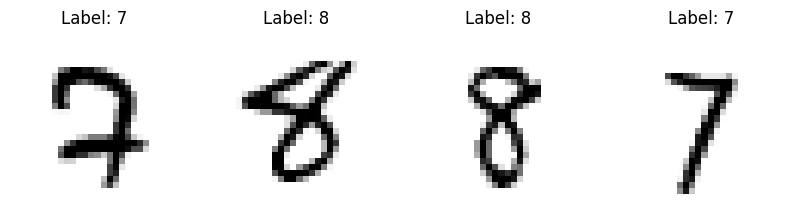

In [15]:
# Visualizando as imagens 28x28 antes da transformação

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, squeezed_images, mnist_test_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

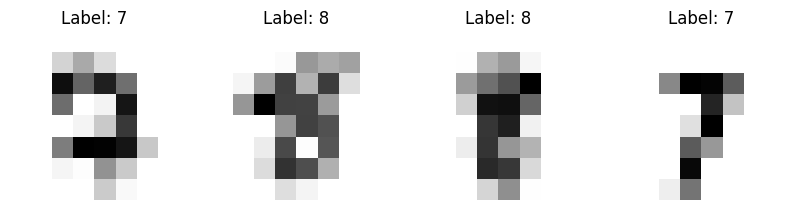

In [16]:
# Visualizando as imagens 8x8

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, mnist_transformed, mnist_test_labels):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")

Vamos passar agora nossas imagens transformadas para que o modelo realize as predições

-> Utilizaremos a função predict para obter os resultados a partir da variavel network, utilizando como parametro nossa variavel mnist_transformed

In [17]:
#função predict a partir do modelo treinado

predictions_mnist = network.predict(mnist_transformed)

print(
    f"Classification report for classifier {network}:\n"
    f"{metrics.classification_report(mnist_test_labels, predictions_mnist)}\n"
)

Classification report for classifier MLPClassifier(hidden_layer_sizes=(50, 20, 10), max_iter=300, random_state=1):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.18      0.40      0.25         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.10      0.50      0.16         4
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       1.00      0.20      0.33         5
           8       0.27      0.38      0.32         8
           9       0.00      0.00      0.00         6

    accuracy                           0.16        50
   macro avg       0.15      0.15      0.11        50
weighted avg       0.17      0.16      0.12        50




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-> Avaliemos o resultado anterior. O modelo manteve a acurácia?

A resposta é:
Não